In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('spotify_dataset.csv')
df = df.iloc[:1000]
data_defin = df[['Index','Highest Charting Position','Streams','Artist Followers','Genre','Tempo','Duration (ms)' ]]

#data_defin["Streams"] = pd.to_numeric(data_defin["Streams"],errors = 'coerce')
data_defin["Streams"] = data_defin["Streams"].str.replace(',','').astype(np.float64)
data_defin["Artist Followers"] = pd.to_numeric(data_defin["Artist Followers"],errors = 'coerce')
data_defin["Tempo"] = pd.to_numeric(data_defin["Tempo"],errors = 'coerce')
data_defin["Duration (ms)"] = pd.to_numeric(data_defin["Duration (ms)"],errors = 'coerce')
print(data_defin.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Index                      1000 non-null   int64  
 1   Highest Charting Position  1000 non-null   int64  
 2   Streams                    1000 non-null   float64
 3   Artist Followers           991 non-null    float64
 4   Genre                      1000 non-null   object 
 5   Tempo                      991 non-null    float64
 6   Duration (ms)              991 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB
None


/tmp/ipykernel_8372/1579712718.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_defin["Streams"] = data_defin["Streams"].str.replace(',','').astype(np.float64)
/tmp/ipykernel_8372/1579712718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_defin["Artist Followers"] = pd.to_numeric(data_defin["Artist Followers"],errors = 'coerce')
/tmp/ipykernel_8372/1579712718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [3]:
data_defin.head()

,Index,Highest Charting Position,Streams,Artist Followers,Genre,Tempo,Duration (ms)
0,1,1,48633449.0,3377762.0,"['indie rock italiano', 'italian pop']",134.002,211560.0
1,2,2,47248719.0,2230022.0,['australian hip hop'],169.928,141806.0
2,3,1,40162559.0,6266514.0,['pop'],166.928,178147.0
3,4,3,37799456.0,83293380.0,"['pop', 'uk pop']",126.026,231041.0
4,5,5,33948454.0,5473565.0,"['lgbtq+ hip hop', 'pop rap']",149.995,212000.0


In [4]:
data_defin = data_defin.dropna()
data_defin.head()


,Index,Highest Charting Position,Streams,Artist Followers,Genre,Tempo,Duration (ms)
0,1,1,48633449.0,3377762.0,"['indie rock italiano', 'italian pop']",134.002,211560.0
1,2,2,47248719.0,2230022.0,['australian hip hop'],169.928,141806.0
2,3,1,40162559.0,6266514.0,['pop'],166.928,178147.0
3,4,3,37799456.0,83293380.0,"['pop', 'uk pop']",126.026,231041.0
4,5,5,33948454.0,5473565.0,"['lgbtq+ hip hop', 'pop rap']",149.995,212000.0


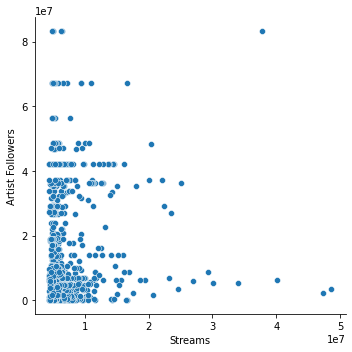

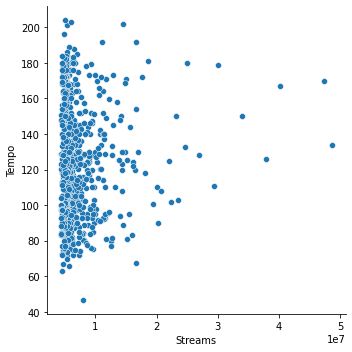

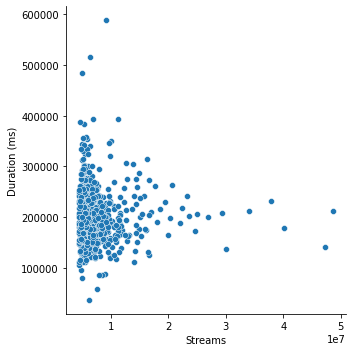

In [5]:
sns.relplot(x='Streams', y='Artist Followers',data=data_defin)
sns.relplot(x='Streams', y='Tempo',data=data_defin)
sns.relplot(x='Streams', y='Duration (ms)',data=data_defin)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data_defin.head()

,Index,Highest Charting Position,Streams,Artist Followers,Genre,Tempo,Duration (ms)
0,1,1,48633449.0,3377762.0,"['indie rock italiano', 'italian pop']",134.002,211560.0
1,2,2,47248719.0,2230022.0,['australian hip hop'],169.928,141806.0
2,3,1,40162559.0,6266514.0,['pop'],166.928,178147.0
3,4,3,37799456.0,83293380.0,"['pop', 'uk pop']",126.026,231041.0
4,5,5,33948454.0,5473565.0,"['lgbtq+ hip hop', 'pop rap']",149.995,212000.0


In [7]:
train = data_defin.drop(['Streams','Highest Charting Position','Index', 'Genre'], axis=1)
test = data_defin['Streams']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3,random_state=2 )

In [9]:
regr = LinearRegression()

In [10]:
regr.fit(x_train,y_train)

LinearRegression()

In [11]:
pred = regr.predict(x_test)
acc = regr.score(x_test, y_test)
print(acc)

-0.014738064517834104


In [16]:
new_input = [[2.12309797, -1.41131072, -123]]
streams = regr.predict(new_input)
print(streams)


[5932994.67082993]


/home/simeon/studie/software_development/spotify-app/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
print(x_test)

     Artist Followers    Tempo  Duration (ms)
630        48544923.0  161.993       182947.0
295        17719446.0  155.008       312820.0
984        19102888.0  117.943       154767.0
561        14921269.0  114.978       144391.0
159         7593046.0  119.987       159083.0
..                ...      ...            ...
540        67208170.0  116.965       167990.0
906         1683006.0  109.019       185330.0
881         3828418.0  145.013       227478.0
130          409173.0  150.006       147072.0
91         67158068.0  144.015       172325.0

[298 rows x 3 columns]


In [ ]:
#print('Choose one of the options you would like to compare:')
for chooseCol in data_defin.columns:
        print(chooseCol)
#colInput1 = input()
print('And:/n')
#colInput2 = input()
print(data_defin)

Index
Highest Charting Position
Streams
Artist Followers
Genre
Tempo
Duration (ms)
And:/n
     Index  Highest Charting Position     Streams  Artist Followers  \
0        1                          1  48633449.0         3377762.0   
1        2                          2  47248719.0         2230022.0   
2        3                          1  40162559.0         6266514.0   
3        4                          3  37799456.0        83293380.0   
4        5                          5  33948454.0         5473565.0   
..     ...                        ...         ...               ...   
995    996                         37   5047752.0        19102888.0   
996    997                        161   4966428.0        22536304.0   
997    998                        174   4823401.0         1700759.0   
998    999                         35   4798078.0        19102888.0   
999   1000                         27   4761155.0        19102888.0   

                                                 Genre   

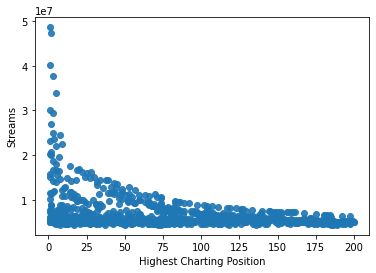

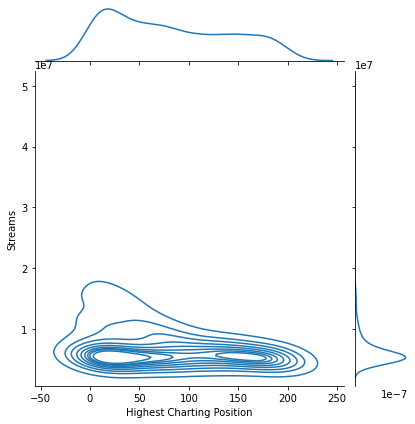

In [ ]:
#print(data_defin.mean())
sns.regplot(x="Highest Charting Position", y="Streams", data=data_defin, fit_reg = False, scatter_kws={"alpha": 0.9})
sns.jointplot(x="Highest Charting Position", y="Streams", data=data_defin, kind = 'kde')